# REDES NEURAIS ARTIFICIAIS

[Aula 3 de Deep Learning](http://bit.ly/dn-unb03) da Engenharia de Software da UnB

# Parte 1 - Pré-processamento dos Dados

### Importar as libs

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [21]:
tf.__version__

'2.5.0'

### Importar o dataset

In [22]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(50)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [23]:
dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [24]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print("X >>\n",X)
print("y >>\n",y)

X >>
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y >>
 [1 0 1 ... 1 1 0]


### Transformando os dados categóricos


In [25]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X[:, 2])

[0 0 0 ... 0 1 0]


In [26]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Dividindo o dataset em conjunto de treinamento e conjunto de teste

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
np.shape(X_train)

(8000, 12)

In [30]:
X_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

---
# Parte 2 -Vamos construir uma ANN!


### Initializing the ANN

In [31]:
# tf.random.set_seed(0) # Get Reproducible Results with Keras

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

def build_ann(activation1, activation2, activation3):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=6, activation=activation1))
    ann.add(tf.keras.layers.Dense(units=6, activation=activation2))
    ann.add(tf.keras.layers.Dense(units=1, activation=activation3))

    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
    y_pred = ann.predict(X_test)
    y_pred
    y_pred = (y_pred > 0.5)
    y_pred

    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
    plt.show()

    print(f'\nAccuracy: {accuracy_score(y_test, y_pred)}')


Epoch 1/100
250/250 [==============================] - 1s 855us/step - loss: 0.5977 - accuracy: 0.2040
Epoch 2/100
250/250 [==============================] - 0s 760us/step - loss: 0.5196 - accuracy: 0.2040
Epoch 3/100
250/250 [==============================] - 0s 783us/step - loss: 0.4942 - accuracy: 0.2040
Epoch 4/100
250/250 [==============================] - 0s 756us/step - loss: 0.4775 - accuracy: 0.2040
Epoch 5/100
250/250 [==============================] - 0s 751us/step - loss: 0.4628 - accuracy: 0.2040
Epoch 6/100
250/250 [==============================] - 0s 811us/step - loss: 0.4495 - accuracy: 0.2040
Epoch 7/100
250/250 [==============================] - 0s 763us/step - loss: 0.4373 - accuracy: 0.2040
Epoch 8/100
250/250 [==============================] - 0s 763us/step - loss: 0.4262 - accuracy: 0.2040
Epoch 9/100
250/250 [==============================] - 0s 852us/step - loss: 0.4166 - accuracy: 0.2040
Epoch 10/100
250/250 [==============================] - 0s 804us/step - l

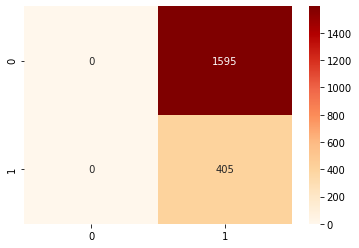


Accuracy: 0.2025


In [33]:
build_ann('softmax', 'softmax', 'softmax')

Epoch 1/100
250/250 [==============================] - 1s 787us/step - loss: 0.5108 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 791us/step - loss: 0.4779 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 831us/step - loss: 0.4526 - accuracy: 0.7972
Epoch 4/100
250/250 [==============================] - 0s 799us/step - loss: 0.4348 - accuracy: 0.8061
Epoch 5/100
250/250 [==============================] - 0s 795us/step - loss: 0.4260 - accuracy: 0.8145
Epoch 6/100
250/250 [==============================] - 0s 751us/step - loss: 0.4216 - accuracy: 0.8204
Epoch 7/100
250/250 [==============================] - 0s 727us/step - loss: 0.4186 - accuracy: 0.8224
Epoch 8/100
250/250 [==============================] - 0s 739us/step - loss: 0.4165 - accuracy: 0.8235
Epoch 9/100
250/250 [==============================] - 0s 743us/step - loss: 0.4149 - accuracy: 0.8239
Epoch 10/100
250/250 [==============================] - 0s 755us/step - l

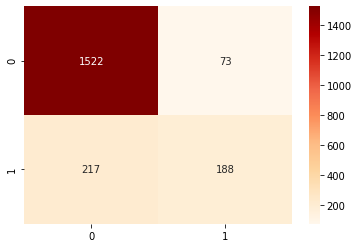


Accuracy: 0.855


In [34]:
build_ann('relu', 'sigmoid', 'sigmoid')

Epoch 1/100
250/250 [==============================] - 1s 863us/step - loss: 0.5402 - accuracy: 0.7372
Epoch 2/100
250/250 [==============================] - 0s 799us/step - loss: 0.4395 - accuracy: 0.8048
Epoch 3/100
250/250 [==============================] - 0s 823us/step - loss: 0.4271 - accuracy: 0.8123
Epoch 4/100
250/250 [==============================] - 0s 831us/step - loss: 0.4213 - accuracy: 0.8156
Epoch 5/100
250/250 [==============================] - 0s 827us/step - loss: 0.4149 - accuracy: 0.8204
Epoch 6/100
250/250 [==============================] - 0s 815us/step - loss: 0.4084 - accuracy: 0.8234
Epoch 7/100
250/250 [==============================] - 0s 787us/step - loss: 0.4011 - accuracy: 0.8267
Epoch 8/100
250/250 [==============================] - 0s 823us/step - loss: 0.3937 - accuracy: 0.8310
Epoch 9/100
250/250 [==============================] - 0s 787us/step - loss: 0.3873 - accuracy: 0.8346
Epoch 10/100
250/250 [==============================] - 0s 807us/step - l

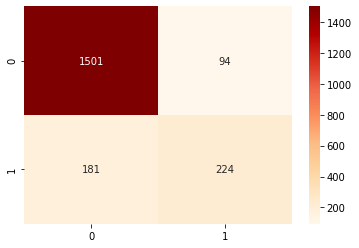


Accuracy: 0.8625


In [35]:
build_ann('tanh', 'tanh', 'sigmoid')

Epoch 1/100
250/250 [==============================] - 1s 739us/step - loss: 0.5636 - accuracy: 0.7324
Epoch 2/100
250/250 [==============================] - 0s 735us/step - loss: 0.4758 - accuracy: 0.7961
Epoch 3/100
250/250 [==============================] - 0s 747us/step - loss: 0.4534 - accuracy: 0.7991
Epoch 4/100
250/250 [==============================] - 0s 888us/step - loss: 0.4368 - accuracy: 0.8085
Epoch 5/100
250/250 [==============================] - 0s 827us/step - loss: 0.4264 - accuracy: 0.8117
Epoch 6/100
250/250 [==============================] - 0s 815us/step - loss: 0.4204 - accuracy: 0.8155
Epoch 7/100
250/250 [==============================] - 0s 803us/step - loss: 0.4180 - accuracy: 0.8161
Epoch 8/100
250/250 [==============================] - 0s 847us/step - loss: 0.4126 - accuracy: 0.8186
Epoch 9/100
250/250 [==============================] - 0s 824us/step - loss: 0.4117 - accuracy: 0.8205
Epoch 10/100
250/250 [==============================] - 0s 855us/step - l

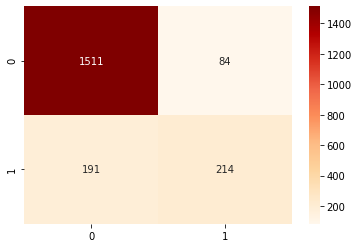


Accuracy: 0.8625


In [38]:
build_ann('sigmoid', 'selu', 'softplus')

Epoch 1/100
250/250 [==============================] - 1s 768us/step - loss: 0.5238 - accuracy: 0.7901
Epoch 2/100
250/250 [==============================] - 0s 745us/step - loss: 0.4872 - accuracy: 0.7946
Epoch 3/100
250/250 [==============================] - 0s 753us/step - loss: 0.4640 - accuracy: 0.7966
Epoch 4/100
250/250 [==============================] - 0s 735us/step - loss: 0.4428 - accuracy: 0.8015
Epoch 5/100
250/250 [==============================] - 0s 735us/step - loss: 0.4263 - accuracy: 0.8123
Epoch 6/100
250/250 [==============================] - 0s 747us/step - loss: 0.4149 - accuracy: 0.8214
Epoch 7/100
250/250 [==============================] - 0s 767us/step - loss: 0.4081 - accuracy: 0.8240
Epoch 8/100
250/250 [==============================] - 0s 751us/step - loss: 0.4024 - accuracy: 0.8267
Epoch 9/100
250/250 [==============================] - 0s 851us/step - loss: 0.3961 - accuracy: 0.8285
Epoch 10/100
250/250 [==============================] - 0s 759us/step - l

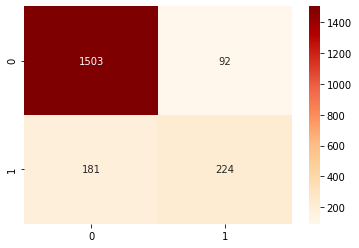


Accuracy: 0.8635


In [37]:
build_ann('exponential', 'tanh', 'sigmoid')

Epoch 1/100
250/250 [==============================] - 1s 763us/step - loss: 5.0518 - accuracy: 0.4639
Epoch 2/100
250/250 [==============================] - 0s 779us/step - loss: 2.4699 - accuracy: 0.5835
Epoch 3/100
250/250 [==============================] - 0s 775us/step - loss: 0.7380 - accuracy: 0.7305
Epoch 4/100
250/250 [==============================] - 0s 787us/step - loss: 0.5236 - accuracy: 0.7753
Epoch 5/100
250/250 [==============================] - 0s 767us/step - loss: 0.4971 - accuracy: 0.7886
Epoch 6/100
250/250 [==============================] - 0s 764us/step - loss: 0.4845 - accuracy: 0.7949
Epoch 7/100
250/250 [==============================] - 0s 819us/step - loss: 0.4752 - accuracy: 0.7952
Epoch 8/100
250/250 [==============================] - 0s 735us/step - loss: 0.4677 - accuracy: 0.7974
Epoch 9/100
250/250 [==============================] - 0s 759us/step - loss: 0.4613 - accuracy: 0.7990
Epoch 10/100
250/250 [==============================] - 0s 759us/step - l

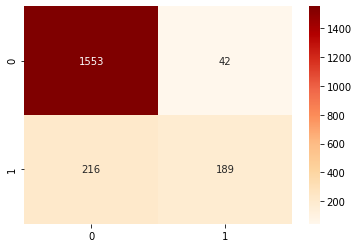


Accuracy: 0.871


In [36]:
build_ann('selu', 'selu', 'softplus')

# FIM

> Professor Diego Dorgam  
> [@diegodorgam](https://twitter.com/diegodorgam)